### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

In [2]:
import pandas as pd
raw_data = pd.read_csv('D:\GIT1\Homework\src\data\github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]

initial_row_count = data.shape[0]
data = data.drop_duplicates()
final_row_count = data.shape[0]

print(f"去重前数据量: {initial_row_count}")
print(f"去重后数据量: {final_row_count}")

data = data.drop(columns=['gravatar_id'])
missing_values = data.isnull().sum()
print("各列的缺失值:")
print(missing_values[missing_values>0])

bool_columns = ['site_admin', 'hireable']  #可转化为布尔值的列
text_columns = ['name','blog','email','company', 'location', 'bio', 'twitter_username']    #需要用空字符串填充的列
data[bool_columns] = data[bool_columns].fillna(False).astype(bool)    #转化布尔列，并填充空值
data[text_columns] = data[text_columns].fillna('')     #填充文本列的空值为空字符串

missing_values = data.isnull().sum()
print("Missing values after handling:")
print(missing_values[missing_values >=0])


# Convert 'created_at' and 'updated_at' columns to datetime if not already
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])

# Convert datetime columns to timestamps (seconds since epoch)
data['created_at_timestamp'] = data['created_at'].apply(lambda x: int(x.timestamp()))
data['updated_at_timestamp'] = data['updated_at'].apply(lambda x: int(x.timestamp()))

# Print the first few rows to verify changes
print(data[['created_at', 'created_at_timestamp', 'updated_at', 'updated_at_timestamp']].head())

<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\86139\AppData\Local\Temp\ipykernel_20808\317458613.py:2: SyntaxWarning: invalid escape sequence '\G'
  raw_data = pd.read_csv('D:\GIT1\Homework\src\data\github_bot_raw_data.csv')


去重前数据量: 20358
去重后数据量: 19779
各列的缺失值:
name                 2589
company              8982
blog                11263
location             7080
email               11739
hireable            16481
bio                 10930
twitter_username    14859
dtype: int64
Missing values after handling:
actor_id               0
label                  0
login                  0
id                     0
node_id                0
avatar_url             0
url                    0
html_url               0
followers_url          0
following_url          0
gists_url              0
starred_url            0
subscriptions_url      0
organizations_url      0
repos_url              0
events_url             0
received_events_url    0
type                   0
site_admin             0
name                   0
company                0
blog                   0
location               0
email                  0
hireable               0
bio                    0
twitter_username       0
public_repos           0
public_gists

C:\Users\86139\AppData\Local\Temp\ipykernel_20808\317458613.py:56: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[bool_columns] = data[bool_columns].fillna(False).astype(bool)    #转化布尔列，并填充空值


C:\Users\86139\AppData\Local\Temp\ipykernel_20808\3445952637.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='viridis')


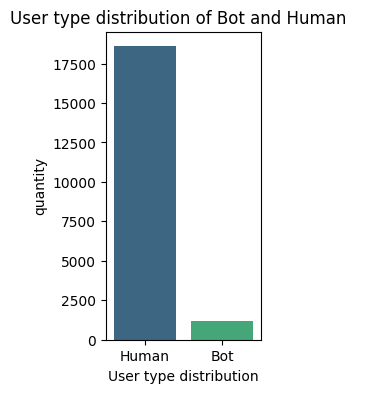

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(2, 4))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('User type distribution of Bot and Human  ')
plt.xlabel('User type distribution')
plt.ylabel('quantity')
plt.show()

#### 选择柱状图的原因：人类和机器人类型的数量用柱状图更好显示，图表显示人类数量远远多于机器人数量，说明human更占据主导权

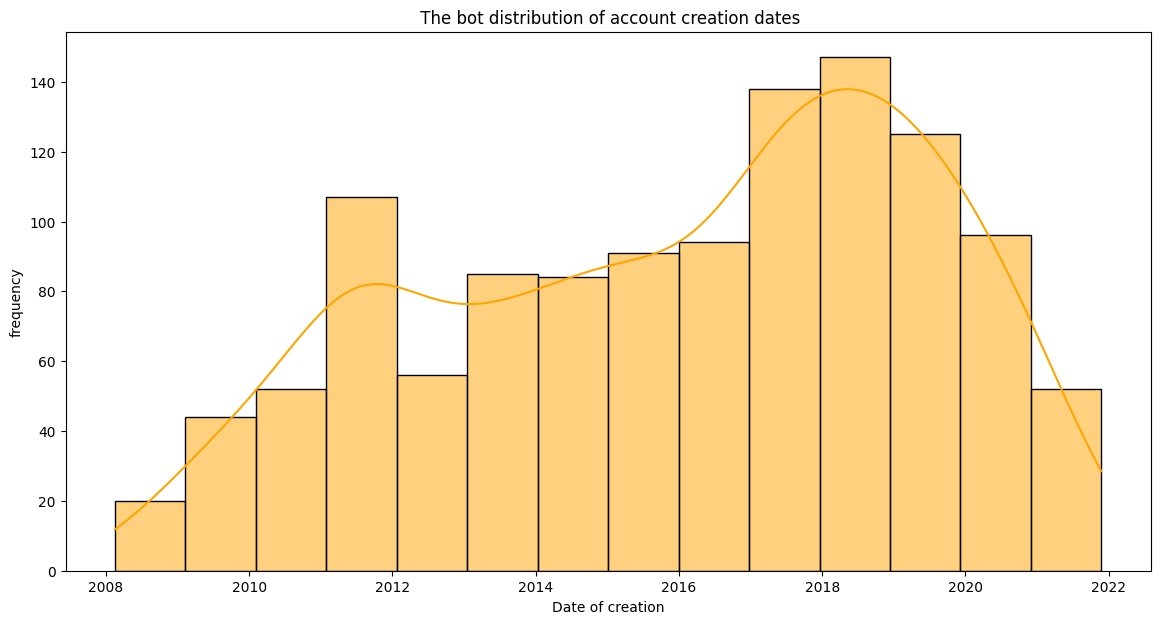

In [6]:
plt.figure(figsize=(14, 7))
bot_data = data[data['label'] == 'Bot']
sns.histplot(bot_data['created_at'], kde=True, color='orange')
plt.title(' The bot distribution of account creation dates')
plt.xlabel('Date of creation')
plt.ylabel('frequency')
plt.show()

#### 选择频率分布直方图的原因是：更清晰的显示bot账号注册时间的分布，显示其比例
#### 图表显示在2018年-2019年，bot账号注册人数最多

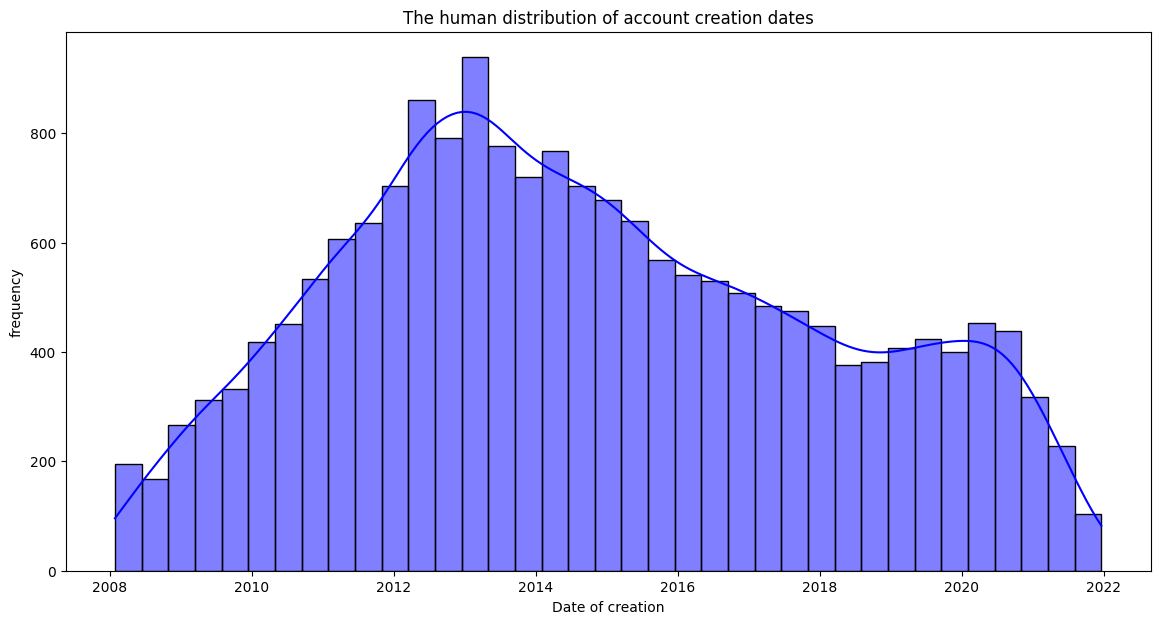

In [8]:
plt.figure(figsize=(14, 7))
human_data = data[data['label'] == 'Human']
sns.histplot(human_data['created_at'], kde=True, color='blue')
plt.title('The human distribution of account creation dates')
plt.xlabel('Date of creation')
plt.ylabel('frequency')
plt.show()

#### 选择频率分布直方图的原因是：更清晰的显示human账号注册时间的分布，显示其比例
#### 图表显示在2013年，human注册人数最多

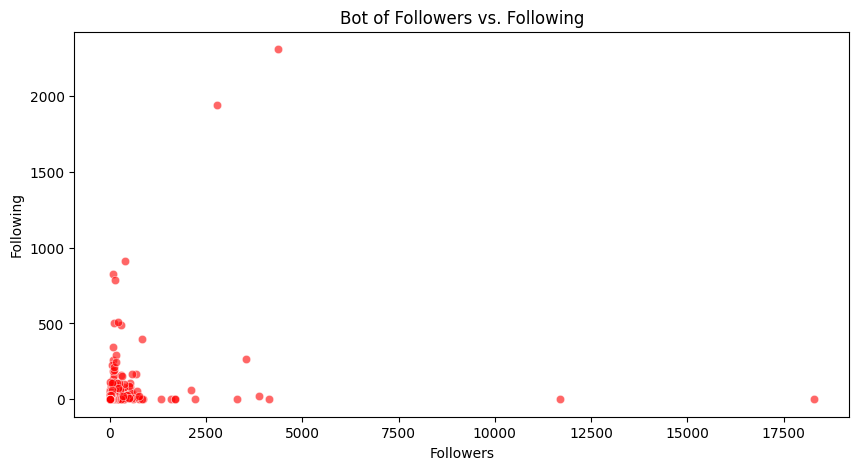

In [13]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='followers', y='following', data=bot_data, alpha=0.6, color='red')
plt.title('Bot of Followers vs. Following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()

#### 选择散点图的原因是：为显示bot账号follower和following的比例，用散点图能清晰看出每个用户的followers和following的数量差距
#### 图表显示有很多followers或者following的账户占少数，大部分账户follower和following都不超过2500

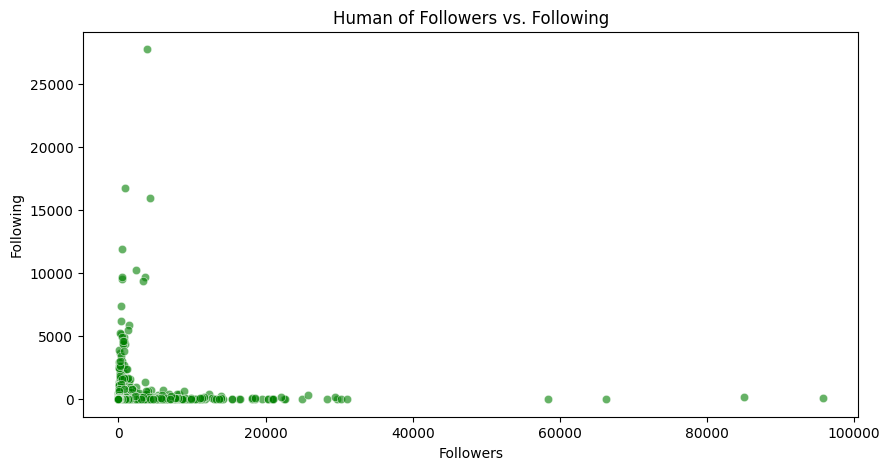

In [11]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='followers', y='following', data=human_data, alpha=0.6, color='green')
plt.title('Human of Followers vs. Following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()

#### 选择散点图的原因是：为显示human账号follower和following的比例，用散点图能清晰看出每个用户的followers和following的数量差距
#### 图表显示有很多followers或者following的账户占少数，大部分账户的follower比following会多一些